In [28]:
#%% Imports
import os
import shutil
import nibabel as nib
import numpy as np
from glob import glob
from scipy import ndimage
from nilearn.image import resample_to_img, resample_img
from nilearn.masking import compute_background_mask, compute_epi_mask
from nilearn.plotting import plot_roi, plot_epi

In [29]:
# Load all predictions

# For each prediction
# Upsample to original size after MNI resampling
# Resample to original shape

In [30]:
# load prediction
root = '/home/uziel/DISS/milestones/DM_V1/output/predictions/trainSession_DM_V1/predictions'
root_2 = '/home/uziel/DISS/data_processed/ISLES2017/training'
segms = glob(os.path.join(root, '*Segm.nii.gz'))
segms_img = []
for s in segms:
    # load prediction
    pred = nib.load(s)
    # Upsample to original size after MNI resampling
    pred = resample_img(pred,
                        2*pred.affine/3, [3*x/2 for x in pred.shape],
                        interpolation='nearest')
    # Find and load original image
    original_path = glob(os.path.join(os.path.join(root_2, s.split('_')[-2]), '*ADC*'))[0]
    original_img = nib.load(original_path)
    # Resample to original shape
    pred = resample_to_img(pred, original_img, interpolation='nearest')

    segms_img.append(pred)
    

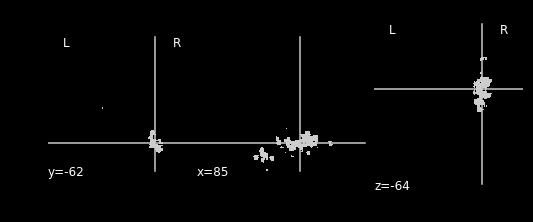

In [31]:
plot_epi(pred)